<a href="https://colab.research.google.com/github/taspett/Test1/blob/master/SHAP_Summary_Viz_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load Libraries
import pandas as pd
import numpy as np
!pip install shap
import shap

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383179 sha256=076bf21875de6b51ef8a527ee3c413491432be16469dcbf3c7926b67bb495fc4
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


# Summary Plot 1

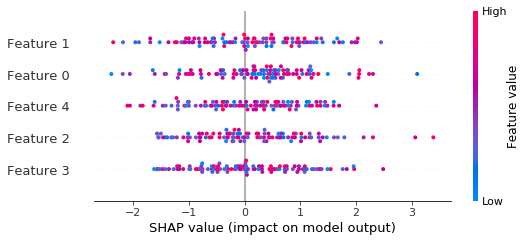

In [0]:
shap.summary_plot(np.random.randn(100, 5), np.random.randn(100, 5))

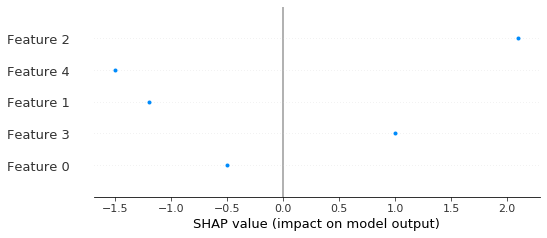

In [0]:
shap.summary_plot(np.array([[-0.5,  -1.2, 2.1, 1.0, -1.5]]), 
                  np.array([[1,  1, 1,  1,  1]]), color_bar=False)

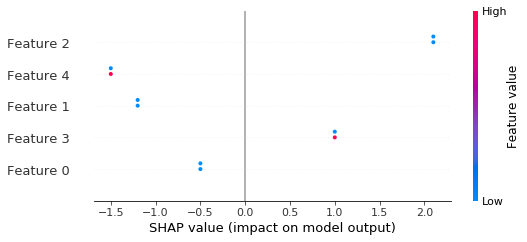

In [0]:
shap.summary_plot(np.array([[-0.5,  -1.2, 2.1, 1.0, -1.5], [-0.5,  -1.2, 2.1, 1.0, -1.5]]), 
                  np.array([[1,  1, 1,  1, 1], [1,  1, 1,  2,  2]]))

# Example: Understanding Influences of Work Performance

For illustration purposes, I've paired downed a HR database from IBM that is available at Kaggle:  https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

This is a popular database and a number of projects have been created based on it: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/kernels


https://www.kaggle.com/vsdwivedi/a-detailed-study-on-employee-attrition
https://www.kaggle.com/patelprashant/employee-attrition/activity

I'm using Google Colab as the Python environment and looking data from my PC before prepping the data.

In [0]:
# Load additional libraries
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['ReducedHR.csv']))

# Data prep: one hot columns
df = pd.get_dummies(df, columns=['Department', 'MaritalStatus', 'Attrition'])

# Make y and X
y = df['PerformanceRating']
X = df.drop(columns='PerformanceRating')


Saving ReducedHR.csv to ReducedHR.csv


Train Model
Train the opaque model. In this case, Random Forest.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


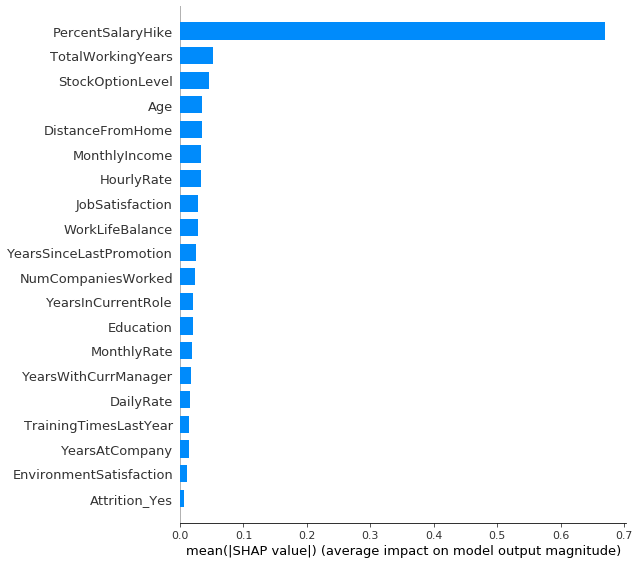

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor

#Split train and test set.
RANDOM_STATE = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

model = RandomForestRegressor(max_depth=4, random_state=RANDOM_STATE, n_estimators=10)
model.fit(X_train, y_train)

!pip install shap
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

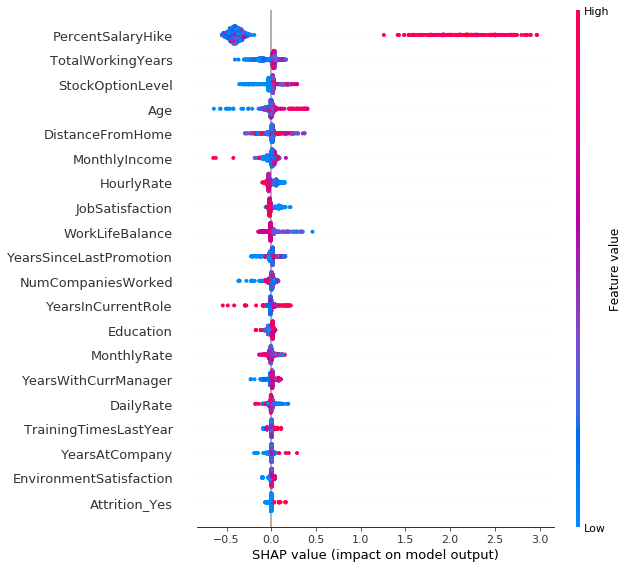

In [0]:
shap.summary_plot(shap_values, X_train)

In [0]:
shap_values1 = np.delete(shap_values, 11, 1)
X_train1 = X_train.drop(columns = 'PercentSalaryHike')

shap_values2 = np.delete(shap_values1, 12, 1)
X_train2 = X_train1.drop(columns = 'StockOptionLevel')

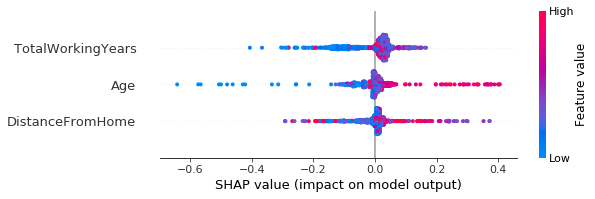

In [0]:
shap.summary_plot(shap_values2, X_train2, max_display=3)

# Summary Plot code

In [0]:
# Load Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# Load my colors
!pip install import-ipynb
import import_ipynb
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/Test_Rewrite_Sum'
import colors

""" Need to run this version of Summary Plot code
"""

from __future__ import division

import warnings
import numpy as np
from scipy.stats import gaussian_kde
try:
    import matplotlib.pyplot as pl
except ImportError:
    warnings.warn("matplotlib could not be loaded!")
    pass
#>  from . import labels
# import colors

labels = {'FEATURE': 'Feature %s',
 'FEATURE_VALUE': 'Feature value',
 'FEATURE_VALUE_HIGH': 'High',
 'FEATURE_VALUE_LOW': 'Low',
 'GLOBAL_VALUE': 'mean(|SHAP value|) (average impact on model output magnitude)',
 'INTERACTION_EFFECT': 'SHAP interaction value for\n%s and %s',
 'INTERACTION_VALUE': 'SHAP interaction value',
 'JOINT_VALUE': 'Joint SHAP value',
 'MAIN_EFFECT': 'SHAP main effect value for\n%s',
 'MODEL_OUTPUT': 'Model output value',
 'PLOT_FOR': 'SHAP plot for %s',
 'VALUE': 'SHAP value (impact on model output)',
 'VALUE_FOR': 'SHAP value for\n%s'}
 
 
# TODO: remove unused title argument / use title argument
def my_summary_plot(shap_values, features=None, feature_names=None, max_display=None, plot_type=None,
                 color=None, axis_color="#333333", title=None, alpha=1, show=True, sort=True,
                 color_bar=True, plot_size="auto", layered_violin_max_num_bins=20, class_names=None,
                 color_bar_label=labels["FEATURE_VALUE"],
                 # depreciated
                 auto_size_plot=None):

#>-----

    # deprication warnings
    if auto_size_plot is not None:
        warnings.warn("auto_size_plot=False is depricated and is now ignored! Use plot_size=None instead.")

    multi_class = False
    if isinstance(shap_values, list):
        multi_class = True
        if plot_type is None:
            plot_type = "bar" # default for multi-output explanations
        assert plot_type == "bar", "Only plot_type = 'bar' is supported for multi-output explanations!"
    else:
        if plot_type is None:
            plot_type = "dot" # default for single output explanations
        assert len(shap_values.shape) != 1, "Summary plots need a matrix of shap_values, not a vector."

    # default color:
    if color is None:
        if plot_type == 'layered_violin':
            color = "coolwarm"
        elif multi_class:
            color = lambda i: colors.red_blue_circle(i/len(shap_values))
        else:
            color = colors.blue_rgb
#>----------------------------------------
#> hard coded in
#> it doesn't do anything if color is not none
#>----------------------------------------

    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
        features = features.values
    elif isinstance(features, list):
        if feature_names is None:
            feature_names = features
        features = None
    elif (features is not None) and len(features.shape) == 1 and feature_names is None:
        feature_names = features
        features = None

    num_features = (shap_values[0].shape[1] if multi_class else shap_values.shape[1])

    if features is not None:
        shape_msg = "The shape of the shap_values matrix does not match the shape of the " \
                    "provided data matrix."
        if num_features - 1 == features.shape[1]:
            assert False, shape_msg + " Perhaps the extra column in the shap_values matrix is the " \
                          "constant offset? Of so just pass shap_values[:,:-1]."
        else:
            assert num_features == features.shape[1], shape_msg

    if feature_names is None:
       feature_names = np.array([labels['FEATURE'] % str(i) for i in range(num_features)])

    # plotting SHAP interaction values
    if not multi_class and len(shap_values.shape) == 3:

        if plot_type == "compact_dot":
            new_shap_values = shap_values.reshape(shap_values.shape[0], -1)
            new_features = np.tile(features, (1, 1, features.shape[1])).reshape(features.shape[0], -1)

            new_feature_names = []
            for c1 in feature_names:
                for c2 in feature_names:
                    if c1 == c2:
                        new_feature_names.append(c1)
                    else:
                        new_feature_names.append(c1 + "* - " + c2)

            return summary_plot(
                new_shap_values, new_features, new_feature_names,
                max_display=max_display, plot_type="dot", color=color, axis_color=axis_color,
                title=title, alpha=alpha, show=show, sort=sort,
                color_bar=color_bar, plot_size=plot_size, class_names=class_names,
                color_bar_label="*" + color_bar_label
            )

        if max_display is None:
            max_display = 7
        else:
            max_display = min(len(feature_names), max_display)

        sort_inds = np.argsort(-np.abs(shap_values.sum(1)).sum(0))

        # get plotting limits
        delta = 1.0 / (shap_values.shape[1] ** 2)
        slow = np.nanpercentile(shap_values, delta)
        shigh = np.nanpercentile(shap_values, 100 - delta)
        v = max(abs(slow), abs(shigh))
        slow = -v
        shigh = v

        pl.figure(figsize=(1.5 * max_display + 1, 0.8 * max_display + 1))
        pl.subplot(1, max_display, 1)
        proj_shap_values = shap_values[:, sort_inds[0], sort_inds]
        proj_shap_values[:, 1:] *= 2  # because off diag effects are split in half
        summary_plot(
            proj_shap_values, features[:, sort_inds] if features is not None else None,
            feature_names=feature_names[sort_inds],
            sort=False, show=False, color_bar=False,
            plot_size=None,
            max_display=max_display
        )
        pl.xlim((slow, shigh))
        pl.xlabel("")
        title_length_limit = 11
        pl.title(shorten_text(feature_names[sort_inds[0]], title_length_limit))
        for i in range(1, min(len(sort_inds), max_display)):
            ind = sort_inds[i]
            pl.subplot(1, max_display, i + 1)
            proj_shap_values = shap_values[:, ind, sort_inds]
            proj_shap_values *= 2
            proj_shap_values[:, i] /= 2  # because only off diag effects are split in half
            summary_plot(
                proj_shap_values, features[:, sort_inds] if features is not None else None,
                sort=False,
                feature_names=["" for i in range(len(feature_names))],
                show=False,
                color_bar=False,
                plot_size=None,
                max_display=max_display
            )
            pl.xlim((slow, shigh))
            pl.xlabel("")
            if i == min(len(sort_inds), max_display) // 2:
                pl.xlabel(labels['INTERACTION_VALUE'])
            pl.title(shorten_text(feature_names[ind], title_length_limit))
        pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)
        pl.subplots_adjust(hspace=0, wspace=0.1)
        if show:
            pl.show()
        return

    if max_display is None:
        max_display = 20

    if sort:
        # order features by the sum of their effect magnitudes
        if multi_class:
            feature_order = np.argsort(np.sum(np.mean(np.abs(shap_values), axis=0), axis=0))
        else:
            feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))
        feature_order = feature_order[-min(max_display, len(feature_order)):]
    else:
        feature_order = np.flip(np.arange(min(max_display, num_features)), 0)

    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, len(feature_order) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, len(feature_order) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    if plot_type == "dot":
        for pos, i in enumerate(feature_order):
            pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
            shaps = shap_values[:, i]
            values = None if features is None else features[:, i]
            inds = np.arange(len(shaps))
            np.random.shuffle(inds)
            if values is not None:
                values = values[inds]
            shaps = shaps[inds]
            colored_feature = True
            try:
                values = np.array(values, dtype=np.float64)  # make sure this can be numeric
            except:
                colored_feature = False
            N = len(shaps)
            # hspacing = (np.max(shaps) - np.min(shaps)) / 200
            # curr_bin = []
            nbins = 100
            quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
            inds = np.argsort(quant + np.random.randn(N) * 1e-6)
            layer = 0
            last_bin = -1
            ys = np.zeros(N)
            for ind in inds:
                if quant[ind] != last_bin:
                    layer = 0
                ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
                layer += 1
                last_bin = quant[ind]
            ys *= 0.9 * (row_height / np.max(ys + 1))

            if features is not None and colored_feature:
                # trim the color range, but prevent the color range from collapsing
                vmin = np.nanpercentile(values, 5)
                vmax = np.nanpercentile(values, 95)
                if vmin == vmax:
                    vmin = np.nanpercentile(values, 1)
                    vmax = np.nanpercentile(values, 99)
                    if vmin == vmax:
                        vmin = np.min(values)
                        vmax = np.max(values)

                assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

                # plot the nan values in the interaction feature as grey
                nan_mask = np.isnan(values)
                pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                           vmax=vmax, s=16, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)

                # plot the non-nan values colored by the trimmed feature value
                cvals = values[np.invert(nan_mask)].astype(np.float64)
                cvals_imp = cvals.copy()
                cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
                cvals[cvals_imp > vmax] = vmax
                cvals[cvals_imp < vmin] = vmin
                pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                           cmap=colors.red_blue, vmin=vmin, vmax=vmax, s=16,
                           c=cvals, alpha=alpha, linewidth=0,
                           zorder=3, rasterized=len(shaps) > 500)

            else:

                pl.scatter(shaps, pos + ys, s=16, alpha=alpha, linewidth=0, zorder=3,
                           color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)

    elif plot_type == "violin":
        for pos, i in enumerate(feature_order):
            pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)

        if features is not None:
            global_low = np.nanpercentile(shap_values[:, :len(feature_names)].flatten(), 1)
            global_high = np.nanpercentile(shap_values[:, :len(feature_names)].flatten(), 99)
            for pos, i in enumerate(feature_order):
                shaps = shap_values[:, i]
                shap_min, shap_max = np.min(shaps), np.max(shaps)
                rng = shap_max - shap_min
                xs = np.linspace(np.min(shaps) - rng * 0.2, np.max(shaps) + rng * 0.2, 100)
                if np.std(shaps) < (global_high - global_low) / 100:
                    ds = gaussian_kde(shaps + np.random.randn(len(shaps)) * (global_high - global_low) / 100)(xs)
                else:
                    ds = gaussian_kde(shaps)(xs)
                ds /= np.max(ds) * 3

                values = features[:, i]
                window_size = max(10, len(values) // 20)
                smooth_values = np.zeros(len(xs) - 1)
                sort_inds = np.argsort(shaps)
                trailing_pos = 0
                leading_pos = 0
                running_sum = 0
                back_fill = 0
                for j in range(len(xs) - 1):

                    while leading_pos < len(shaps) and xs[j] >= shaps[sort_inds[leading_pos]]:
                        running_sum += values[sort_inds[leading_pos]]
                        leading_pos += 1
                        if leading_pos - trailing_pos > 20:
                            running_sum -= values[sort_inds[trailing_pos]]
                            trailing_pos += 1
                    if leading_pos - trailing_pos > 0:
                        smooth_values[j] = running_sum / (leading_pos - trailing_pos)
                        for k in range(back_fill):
                            smooth_values[j - k - 1] = smooth_values[j]
                    else:
                        back_fill += 1

                vmin = np.nanpercentile(values, 5)
                vmax = np.nanpercentile(values, 95)
                if vmin == vmax:
                    vmin = np.nanpercentile(values, 1)
                    vmax = np.nanpercentile(values, 99)
                    if vmin == vmax:
                        vmin = np.min(values)
                        vmax = np.max(values)
                pl.scatter(shaps, np.ones(shap_values.shape[0]) * pos, s=9, cmap=colors.red_blue, vmin=vmin, vmax=vmax,
                           c=values, alpha=alpha, linewidth=0, zorder=1)
                # smooth_values -= nxp.nanpercentile(smooth_values, 5)
                # smooth_values /= np.nanpercentile(smooth_values, 95)
                smooth_values -= vmin
                if vmax - vmin > 0:
                    smooth_values /= vmax - vmin
                for i in range(len(xs) - 1):
                    if ds[i] > 0.05 or ds[i + 1] > 0.05:
                        pl.fill_between([xs[i], xs[i + 1]], [pos + ds[i], pos + ds[i + 1]],
                                        [pos - ds[i], pos - ds[i + 1]], color=colors.red_blue(smooth_values[i]),
                                        zorder=2)

        else:
            parts = pl.violinplot(shap_values[:, feature_order], range(len(feature_order)), points=200, vert=False,
                                  widths=0.7,
                                  showmeans=False, showextrema=False, showmedians=False)

            for pc in parts['bodies']:
                pc.set_facecolor(color)
                pc.set_edgecolor('none')
                pc.set_alpha(alpha)

    elif plot_type == "layered_violin":  # courtesy of @kodonnell
        num_x_points = 200
        bins = np.linspace(0, features.shape[0], layered_violin_max_num_bins + 1).round(0).astype(
            'int')  # the indices of the feature data corresponding to each bin
        shap_min, shap_max = np.min(shap_values), np.max(shap_values)
        x_points = np.linspace(shap_min, shap_max, num_x_points)

        # loop through each feature and plot:
        for pos, ind in enumerate(feature_order):
            # decide how to handle: if #unique < layered_violin_max_num_bins then split by unique value, otherwise use bins/percentiles.
            # to keep simpler code, in the case of uniques, we just adjust the bins to align with the unique counts.
            feature = features[:, ind]
            unique, counts = np.unique(feature, return_counts=True)
            if unique.shape[0] <= layered_violin_max_num_bins:
                order = np.argsort(unique)
                thesebins = np.cumsum(counts[order])
                thesebins = np.insert(thesebins, 0, 0)
            else:
                thesebins = bins
            nbins = thesebins.shape[0] - 1
            # order the feature data so we can apply percentiling
            order = np.argsort(feature)
            # x axis is located at y0 = pos, with pos being there for offset
            y0 = np.ones(num_x_points) * pos
            # calculate kdes:
            ys = np.zeros((nbins, num_x_points))
            for i in range(nbins):
                # get shap values in this bin:
                shaps = shap_values[order[thesebins[i]:thesebins[i + 1]], ind]
                # if there's only one element, then we can't
                if shaps.shape[0] == 1:
                    warnings.warn(
                        "not enough data in bin #%d for feature %s, so it'll be ignored. Try increasing the number of records to plot."
                        % (i, feature_names[ind]))
                    # to ignore it, just set it to the previous y-values (so the area between them will be zero). Not ys is already 0, so there's
                    # nothing to do if i == 0
                    if i > 0:
                        ys[i, :] = ys[i - 1, :]
                    continue
                # save kde of them: note that we add a tiny bit of gaussian noise to avoid singular matrix errors
                ys[i, :] = gaussian_kde(shaps + np.random.normal(loc=0, scale=0.001, size=shaps.shape[0]))(x_points)
                # scale it up so that the 'size' of each y represents the size of the bin. For continuous data this will
                # do nothing, but when we've gone with the unqique option, this will matter - e.g. if 99% are male and 1%
                # female, we want the 1% to appear a lot smaller.
                size = thesebins[i + 1] - thesebins[i]
                bin_size_if_even = features.shape[0] / nbins
                relative_bin_size = size / bin_size_if_even
                ys[i, :] *= relative_bin_size
            # now plot 'em. We don't plot the individual strips, as this can leave whitespace between them.
            # instead, we plot the full kde, then remove outer strip and plot over it, etc., to ensure no
            # whitespace
            ys = np.cumsum(ys, axis=0)
            width = 0.8
            scale = ys.max() * 2 / width  # 2 is here as we plot both sides of x axis
            for i in range(nbins - 1, -1, -1):
                y = ys[i, :] / scale
                c = pl.get_cmap(color)(i / (
                        nbins - 1)) if color in pl.cm.datad else color  # if color is a cmap, use it, otherwise use a color
                pl.fill_between(x_points, pos - y, pos + y, facecolor=c)
        pl.xlim(shap_min, shap_max)

    elif not multi_class and plot_type == "bar":
        feature_inds = feature_order[:max_display]
        y_pos = np.arange(len(feature_inds))
        global_shap_values = np.abs(shap_values).mean(0)
        pl.barh(y_pos, global_shap_values[feature_inds], 0.7, align='center', color=color)
        pl.yticks(y_pos, fontsize=13)
        pl.gca().set_yticklabels([feature_names[i] for i in feature_inds])

    elif multi_class and plot_type == "bar":
        if class_names is None:
            class_names = ["Class "+str(i) for i in range(len(shap_values))]
        feature_inds = feature_order[:max_display]
        y_pos = np.arange(len(feature_inds))
        left_pos = np.zeros(len(feature_inds))

        class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
        for i,ind in enumerate(class_inds):
            global_shap_values = np.abs(shap_values[ind]).mean(0)
            pl.barh(
                y_pos, global_shap_values[feature_inds], 0.7, left=left_pos, align='center',
                color=color(i), label=class_names[ind]
            )
            left_pos += global_shap_values[feature_inds]
        pl.yticks(y_pos, fontsize=13)
        pl.gca().set_yticklabels([feature_names[i] for i in feature_inds])
        pl.legend(frameon=False, fontsize=12)

    # draw the color bar
    if color_bar and features is not None and plot_type != "bar" and \
            (plot_type != "layered_violin" or color in pl.cm.datad):
        import matplotlib.cm as cm
        m = cm.ScalarMappable(cmap=colors.red_blue if plot_type != "layered_violin" else pl.get_cmap(color))
        m.set_array([0, 1])
        cb = pl.colorbar(m, ticks=[0, 1], aspect=1000)
        cb.set_ticklabels([labels['FEATURE_VALUE_LOW'], labels['FEATURE_VALUE_HIGH']])
        cb.set_label(color_bar_label, size=12, labelpad=0)
        cb.ax.tick_params(labelsize=11, length=0)
        cb.set_alpha(1)
        cb.outline.set_visible(False)
        bbox = cb.ax.get_window_extent().transformed(pl.gcf().dpi_scale_trans.inverted())
        cb.ax.set_aspect((bbox.height - 0.9) * 20)
        # cb.draw_all()

    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('none')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    pl.gca().spines['left'].set_visible(False)
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_order)), [feature_names[i] for i in feature_order], fontsize=13)
    if plot_type != "bar":
        pl.gca().tick_params('y', length=20, width=0.5, which='major')
    pl.gca().tick_params('x', labelsize=11)
    pl.ylim(-1, len(feature_order))
    if plot_type == "bar":
      pl.xlabel(labels['GLOBAL_VALUE'], fontsize=13)
    else:
      pl.xlabel(labels['VALUE'], fontsize=13)
    if show:
        pl.show()

#>    print(color)
#>    print('Hello from Summary 3!')
#>------

def shorten_text(text, length_limit):
    if len(text) > length_limit:
        return text[:length_limit - 3] + "..."
    else:
        return text


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=ce4f7db3b2b3e149f13cd3f6d3eedb443ae7cdd9b85e9889ef5faec338cb1769
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Test_Rewrite_Sum
importing Jupyter notebook from colors.ipynb
importing Jupyter notebook from colorconv.ipynb
blue rgb [0. 

Color data out of range: Z < 0 in 1 pixels


# New Summary Plot

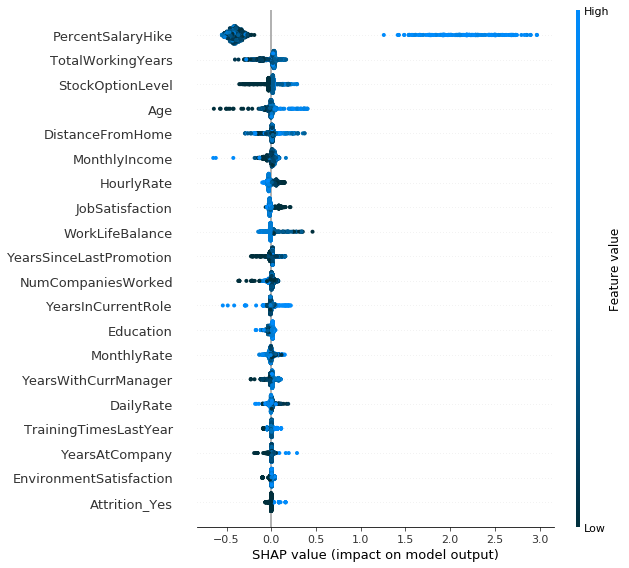

In [0]:
my_summary_plot(shap_values, X_train)

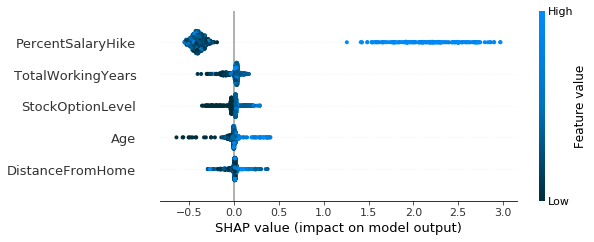

In [0]:
my_summary_plot(shap_values, X_train, max_display=5)

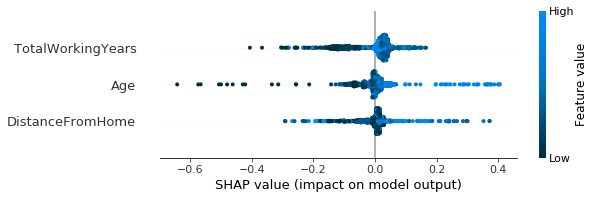

In [0]:
my_summary_plot(shap_values2, X_train2, max_display=3)



---



---



---



---



---



In [0]:
S = np.array([[ 1.54544103,  0.46845879, -0.76350815, -1.42423543, -1.06443276]])
F1 = np.array([[1,  1, 1,  1,  1]])

In [0]:
shap.summary_plot(S, F1, color_bar=False)

In [0]:
S = np.array([[ 1.54544103,  0.46845879, -0.76350815, -1.42423543, -1.06443276]])
I = np.array([[-0.27564922,  1.67558195, -0.42834453,  0.33374099,  0.64530571]])
F1 = np.array([[1,  1, 1,  1,  1]])
F2 = np.array([[1,  1, 1,  1,  1], [1,  1, 1,  1,  1]])
S2 = np.array([[ 1.54544103,  0.46845879, -0.76350815, -1.42423543, -1.06443276],
       [ 1.54544103,  0.46845879, -0.76350815, -1.42423543, -1.06443276]])

S3 = np.array([[ 1.54544103,  0.46845879, -0.76350815, -1.42423543, -1.06443276],
       [-0.27564922,  1.67558195, -0.42834453,  0.33374099,  0.64530571]])
I2 = np.array([[-0.58281414,  0.1535211 ,  1.01819794,  1.18447585,  1.15124862],
       [-1.36005199,  1.49160778,  1.24316391,  1.52189007, -0.33657231]])

In [0]:
print(type(S))
print(S.shape)
print(type(F1))
print(F1.shape)

<class 'numpy.ndarray'>
(1, 5)
<class 'numpy.ndarray'>
(1, 5)


In [0]:
np.random.randn(2, 5)

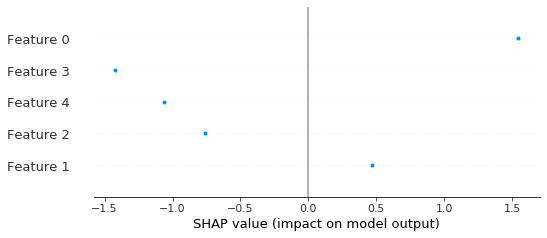

In [0]:
shap.summary_plot(S, F1, color_bar=False)

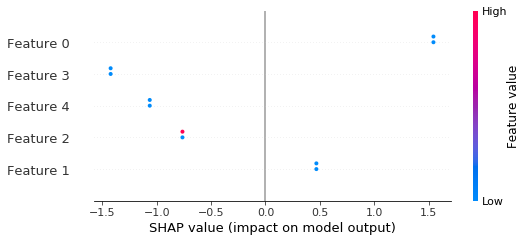

In [0]:
F2 = np.array([[1,  1, 1,  1,  1], [1,  1, 5,  1,  1]])
shap.summary_plot(S2, F2)

In [0]:
shap.summary_plot(S, I)

In [0]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [0]:
shap.summary_plot(np.random.randn(2, 5), np.random.randn(2, 5))

In [0]:
shap.summary_plot(np.random.randn(500, 5), np.random.randn(500, 5))

In [0]:
shap.plots.labels

In [0]:
type(shap.plots.labels)

In [0]:
shap.plots.colors.red_blue

In [0]:
T1=shap.plots.colors.reds
T2=shap.plots.colors.blues

shap.plots.colors.reds = T2
shap.plots.colors.blues = T1

# cannot override this since this is hardcoded in, and is calculated every time summary_plot is run.


In [0]:
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5))

Cannot figure out how to override a variable...

shap.plots.colors.blue_rgb is NOT used for some reason


In [0]:
!pip install ipdb

In [0]:
import ipdb
ipdb.set_trace()
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5))

In [0]:
shap.plots.colors.blue_rgb

In [0]:
# if I delete it tben summary_plot doens't work

del shap.plots.colors.blue_rgb
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5))

In [0]:
blue_lch = [54., 70., 4.6588]
l_mid = 40.
red_lch = [54., 90., 0.35470565 + 2* np.pi]
gray_lch = [55., 0., 0.]
# shap.plots.colors.blue_rgb = shap.plots.colors.lch2rgb(blue_lch)
shap.plots.colors.blue_rgb = 'abc'



In [0]:
del shap.plots.colors.blue_rgb

In [0]:
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5))

In [0]:
shap.plots.color

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/Test_Colors/Colors'

In [0]:
%ls

In [0]:
!pip install import-ipynb
import import_ipynb

In [0]:
import colorconv

In [0]:

        
# define our colors using Lch
# note that we intentionally vary the lightness during interpolation so as to better
# enable the eye to see patterns (since patterns are most easily recognized through
# lightness variability)

blue_lch = [54., 70., 4.6588]
l_mid = 40.
red_lch = [54., 90., 0.35470565 + 2* np.pi]
gray_lch = [55., 0., 0.]
blue_rgb = lch2rgb(blue_lch)
red_rgb = lch2rgb(red_lch)
gray_rgb = lch2rgb(gray_lch)



---



---



---



---



---



In [0]:
shap.plots.colors.colors

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/Test_Colors/Summary'

In [0]:
!pip install import-ipynb
import import_ipynb

In [0]:
import Summary2

In [0]:
Summary2.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5), plot_type="dot")


In [0]:
shap.plots.colors.blue_rgb

In [0]:

shap.plots.colors.blue_rgb= np.array([0., 0., 0.])

In [0]:
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5))



---

---





---



---



In [0]:
import sys

In [0]:
del sys.modules['shap.plots.summary']

In [0]:
del shap.summary_plot

In [0]:
# this is useful to find out the name of the modules
print(sys.modules)

In [0]:
%ls

In [0]:
print(shap.__file__)

In [0]:
help('modules')

In [0]:
%ls

In [0]:

sys.modules[shap.plots.summary] = __import__('Summary2')


In [0]:
import shap.plots.summary

In [0]:
shap.summary_plot(np.random.randn(20, 5), np.random.randn(20, 5), plot_type="dot")

In [0]:
del Summary2.summary_plot

In [0]:
hello()

In [0]:
from TestSum import summary_plot_w

In [0]:
summary_plot_w([np.random.randn(20, 5) for i in range(3)], np.random.randn(20, 5), show=False)

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/SHAP/ColorsExp')

In [0]:
%ls

In [0]:
import colors

In [0]:
from TestSum import summary_plot

# dont know why this doesn't work VVV

In [0]:
summary_plot(np.random.randn(20, 5), np.random.randn(20, 5), plot_type="dot", show=False)



---



---



In [0]:
import shapl

In [0]:
summary.my_function()

In [0]:
import Test2

In [0]:

import Test3



---



---



---

below doesn't work...

In [0]:
from google.colab import files
src = list(files.upload().values())[0]
open('Test1.ipynb','wb').write(src)
import Test1

In [0]:
import summary

In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [0]:
# !git clone https://github.com/fastai/courses.git

!git clone https://github.com/taspett/color1
!ls

In [0]:
%ls
